# Implement with R

Understand the various Randomised Block Design, Latin Squares types.

## The Vascular Graft Experiment

This experiment aims to give a sense of **Randomised Complete Block Design (RCBD)**. 

Suppose a medical device manufacturer would like to determine the levels of extrusion pressure (treatments), as some tubes in a production contain small and hard protrusions on the external surface which is a cause for rejection of the product (known as "flicks").

There may be significant batch-to-batch variation (`6` batches) due to manufacturing variation at the resin supplier side and natural variation in the material despite produce process of consistency with respect to parameters such as molecular weight, mean particle size, retention.

Hence, the product developer decides to investigate the effect of `4` different levels of extrusion pressure on the "flicks" via RCBD considering different batches of resin as blocks. 

Note that the order in which the extrusion pressures are tested within each block is random. 

The response variable is yield, or the percentage of tubes in the production run that does not contain "flicks".

Firstly, import the data

In [1]:
dataset <- read.csv("vascular.csv")

Display table to get a sense of the data

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
dataset_tbl <- data.frame(Treatment=unique(dataset$Treatment),
                          Block.1=(dataset %>% filter(Block == "batch1"))$Yield,
                          Block.2=(dataset %>% filter(Block == "batch2"))$Yield,
                          Block.3=(dataset %>% filter(Block == "batch3"))$Yield,
                          Block.4=(dataset %>% filter(Block == "batch4"))$Yield,
                          Block.5=(dataset %>% filter(Block == "batch5"))$Yield,
                          Block.6=(dataset %>% filter(Block == "batch6"))$Yield,
                          Totals=(dataset %>% group_by(Treatment) %>% summarise(Totals=sum(Yield)))$Totals)
dataset_tbl

Treatment,Block.1,Block.2,Block.3,Block.4,Block.5,Block.6,Totals
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8500psi,90.3,89.2,98.2,93.9,87.4,97.9,556.9
8700psi,92.5,89.5,90.6,94.7,87.0,95.8,550.1
8900psi,85.5,90.8,89.6,86.2,88.0,93.4,533.5
9100psi,82.5,89.5,85.6,87.4,78.9,90.7,514.6


Display totals of each blocks

In [4]:
data.frame(Block.1=sum(dataset_tbl$Block.1),
           Block.2=sum(dataset_tbl$Block.2),
           Block.3=sum(dataset_tbl$Block.3),
           Block.4=sum(dataset_tbl$Block.4),
           Block.5=sum(dataset_tbl$Block.5),
           Block.6=sum(dataset_tbl$Block.6),
           Totals=sum(dataset_tbl$Totals))

Block.1,Block.2,Block.3,Block.4,Block.5,Block.6,Totals
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
350.8,359,364,362.2,341.3,377.8,2155.1


Display boxplot for data

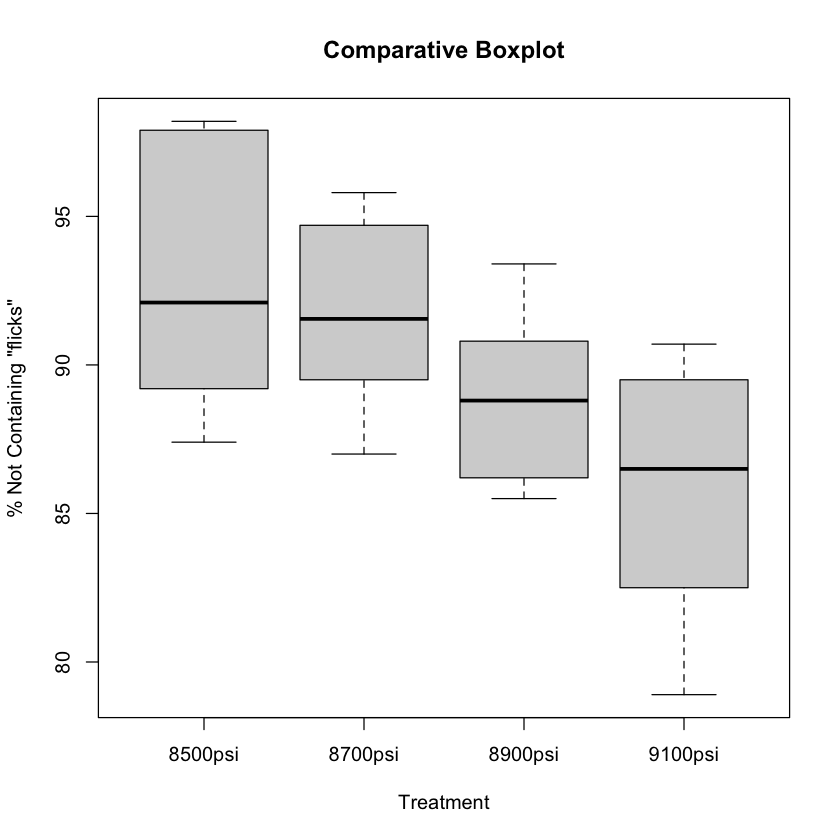

In [5]:
boxplot(Yield ~ Treatment, data=dataset, 
        main="Comparative Boxplot",
        xlab="Treatment",
        ylab="% Not Containing \"flicks\"")

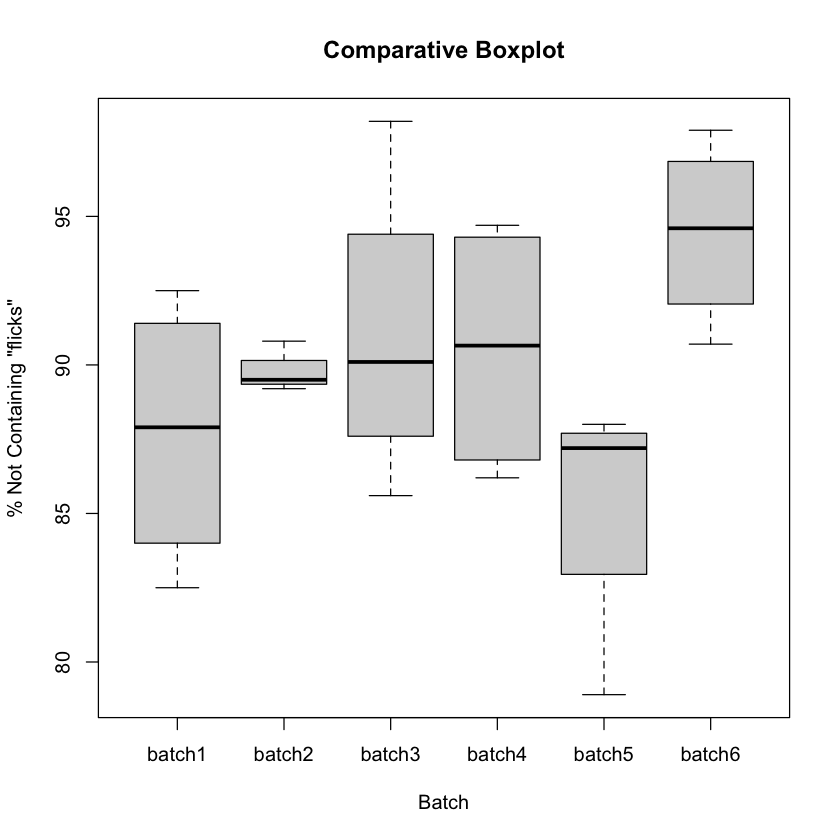

In [6]:
boxplot(Yield ~ Block, data=dataset, 
        main="Comparative Boxplot",
        xlab="Batch",
        ylab="% Not Containing \"flicks\"")

Using blocking in ANOVA

In [7]:
anova <- aov(Yield ~ Treatment + Block, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Treatment    3  178.2   59.39   8.107 0.00192 **
Block        5  192.2   38.45   5.249 0.00553 **
Residuals   15  109.9    7.33                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Display the Residual Diagnostic Plots

hat values (leverages) are all = 0.375
 and there are no factor predictors; no plot no. 5



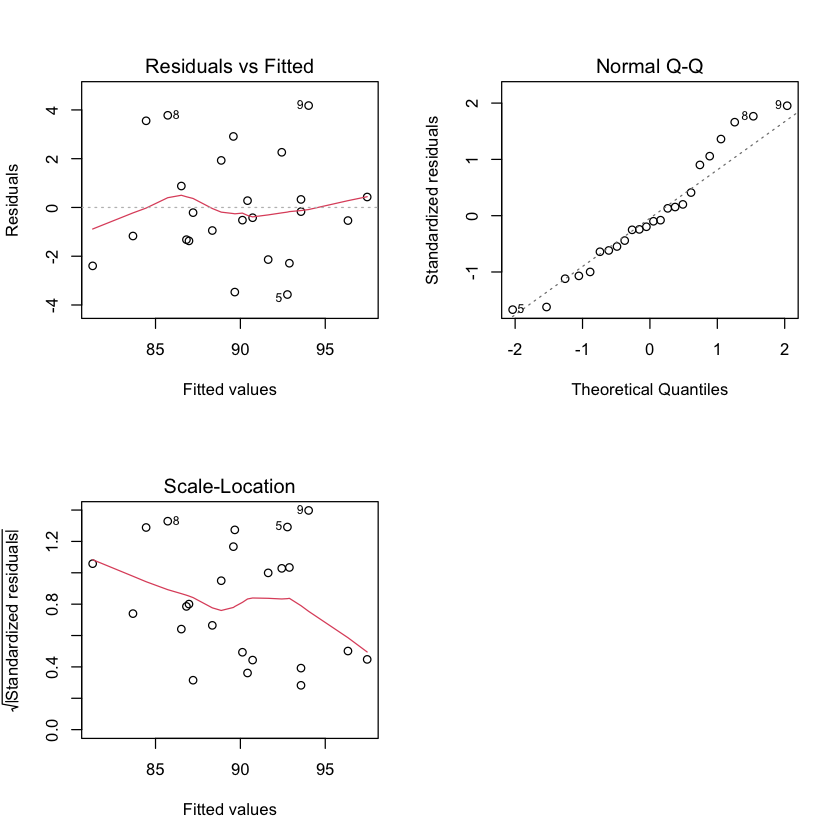

In [8]:
par(mfrow=c(2,2))
plot(anova)

Set the factor as the treatment level

In [9]:
dataset$Treatment <- as.factor(dataset$Treatment)

Using no blocking in ANOVA

Notice that although the end-result is still less than `0.05`, it still risks of ending up with a wrong conclusion as there is an increase of `0.0234/0.00192 = 12` times.

In [10]:
anova <- aov(Yield ~ Treatment, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value Pr(>F)  
Treatment    3  178.2   59.39   3.931 0.0234 *
Residuals   20  302.1   15.11                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Display the Residual Diagnostic Plots

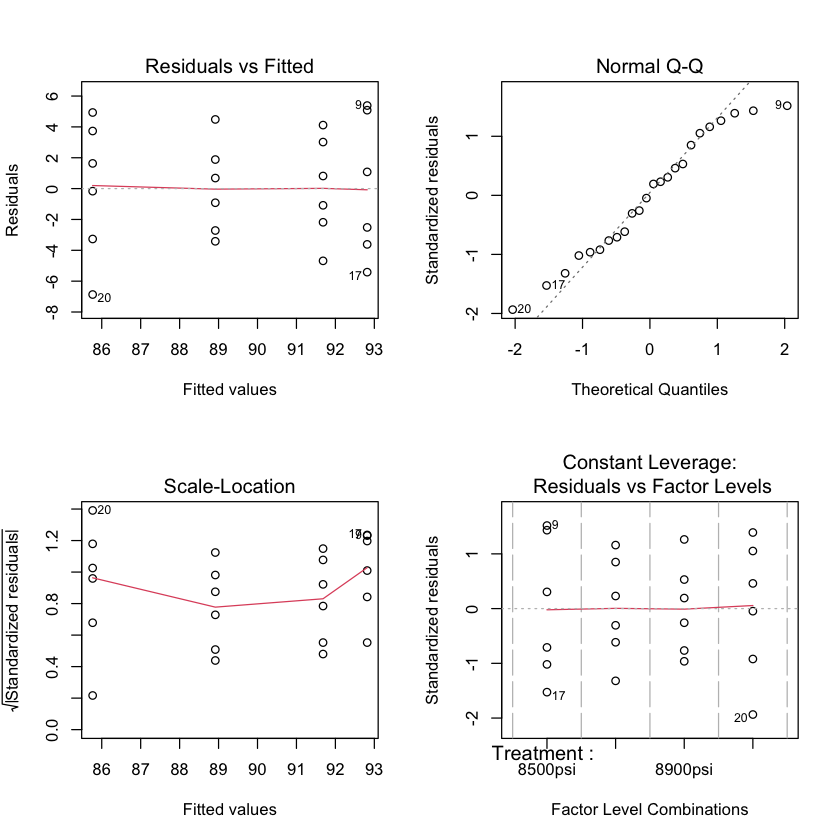

In [11]:
par(mfrow=c(2,2))
plot(anova)

Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. Conclusion. We reject the null hypothesis as p-value < `0.05` (alpha level), indicating that there is insufficient evidence that all the factor means are equal.

Therefore, the extrusion pressure signifcantly affects the mean yield - the percentage of tubes in the production run that does not contain "flicks".

## The Rocket Propellant Experiment

This experiment aims to give a sense of **Latin Square Design**.

Suppose that an experimenter is studying the effects of `5` different formulations ("A", ..., "E") of a rocket propellant used in aircrew escape systems on the observed burning rate, and each is mixed from a batch of raw material that is only large enough for `5` formulations to be tested.

The formulations are prepared by several operators, and there may be substantial differences in the skills and experience of the operators. 

This gives `2` nuisance variables in the design: batches of raw material and operators. 

We would need to test each formulation exactly once in each batch of raw material and for each formulation to be prepared exactly once by each of five operators. Therefore, we use the LSD to do such.

Firstly, import the data

In [12]:
dataset <- read.csv("rocket1.csv")

Display table to get a sense of the data

In [13]:
data.frame(Batch=unique(dataset$Batch),
           Operator.1=(dataset %>% filter(Operator == "op1") %>% summarise(Pair=paste(Treatment, " = ", Burn.Rate)))$Pair,
           Operator.2=(dataset %>% filter(Operator == "op2") %>% summarise(Pair=paste(Treatment, " = ", Burn.Rate)))$Pair, 
           Operator.3=(dataset %>% filter(Operator == "op3") %>% summarise(Pair=paste(Treatment, " = ", Burn.Rate)))$Pair, 
           Operator.4=(dataset %>% filter(Operator == "op4") %>% summarise(Pair=paste(Treatment, " = ", Burn.Rate)))$Pair, 
           Operator.5=(dataset %>% filter(Operator == "op5") %>% summarise(Pair=paste(Treatment, " = ", Burn.Rate)))$Pair,
           Totals=(dataset %>% group_by(Batch) %>% summarise(Totals=sum(Burn.Rate)))$Totals)

Batch,Operator.1,Operator.2,Operator.3,Operator.4,Operator.5,Totals
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
batch1,A = 24,B = 20,C = 19,D = 24,E = 24,111
batch2,B = 17,C = 24,D = 30,E = 27,A = 36,134
batch3,C = 18,D = 38,E = 26,A = 27,B = 21,130
batch4,D = 26,E = 31,A = 26,B = 23,C = 22,128
batch5,E = 22,A = 30,B = 20,C = 29,D = 31,132


Display totals for each operator

In [14]:
data.frame(Operator.1=sum((dataset %>% filter(Operator == "op1"))$Burn.Rate),
           Operator.2=sum((dataset %>% filter(Operator == "op2"))$Burn.Rate),
           Operator.3=sum((dataset %>% filter(Operator == "op3"))$Burn.Rate),
           Operator.4=sum((dataset %>% filter(Operator == "op4"))$Burn.Rate),
           Operator.5=sum((dataset %>% filter(Operator == "op5"))$Burn.Rate),
           Totals=sum((dataset %>% group_by(Batch) %>% summarise(Totals=sum(Burn.Rate)))$Totals))

Operator.1,Operator.2,Operator.3,Operator.4,Operator.5,Totals
<int>,<int>,<int>,<int>,<int>,<int>
107,143,121,130,134,635


Display totals of each treatment

In [15]:
t(dataset %>% group_by(Treatment) %>% summarise(Totals=sum(Burn.Rate)))

Treatment,A,B,C,D,E
Totals,143,101,112,149,130


Notice that every batch has a combination of treatments once

In [16]:
dataset %>% arrange(Treatment) %>% group_by(Batch) %>% summarise(Treatments=paste0(Treatment, collapse=" , "))

Batch,Treatments
<chr>,<chr>
batch1,"A , B , C , D , E"
batch2,"A , B , C , D , E"
batch3,"A , B , C , D , E"
batch4,"A , B , C , D , E"
batch5,"A , B , C , D , E"


Display boxplot for data

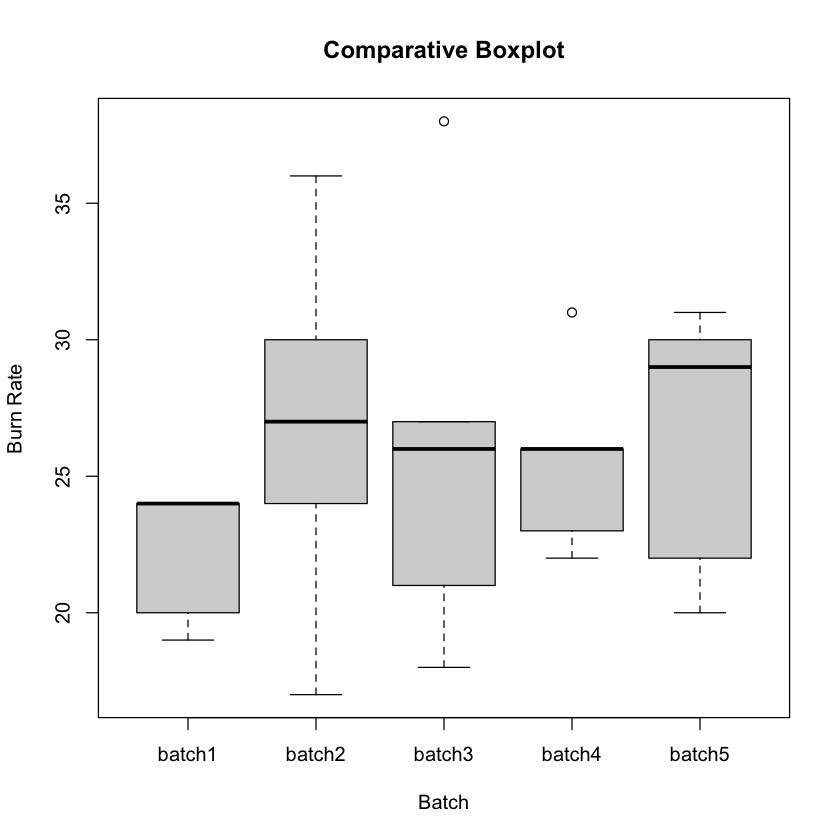

In [17]:
boxplot(Burn.Rate ~ Batch, data=dataset, 
        main="Comparative Boxplot",
        xlab="Batch",
        ylab="Burn Rate")

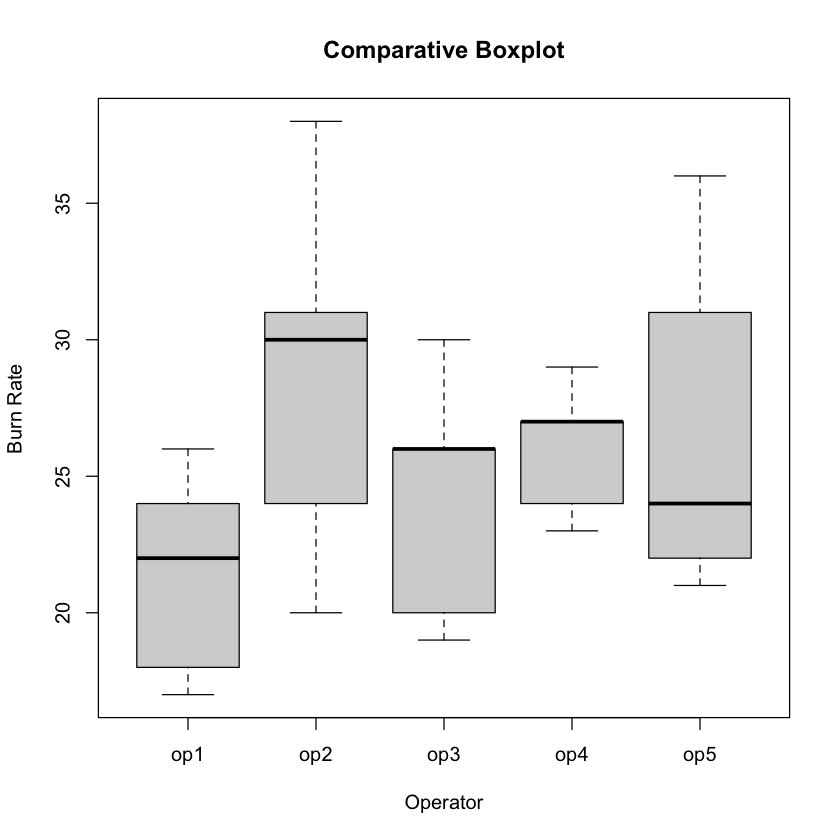

In [18]:
boxplot(Burn.Rate ~ Operator, data=dataset, 
        main="Comparative Boxplot",
        xlab="Operator",
        ylab="Burn Rate")

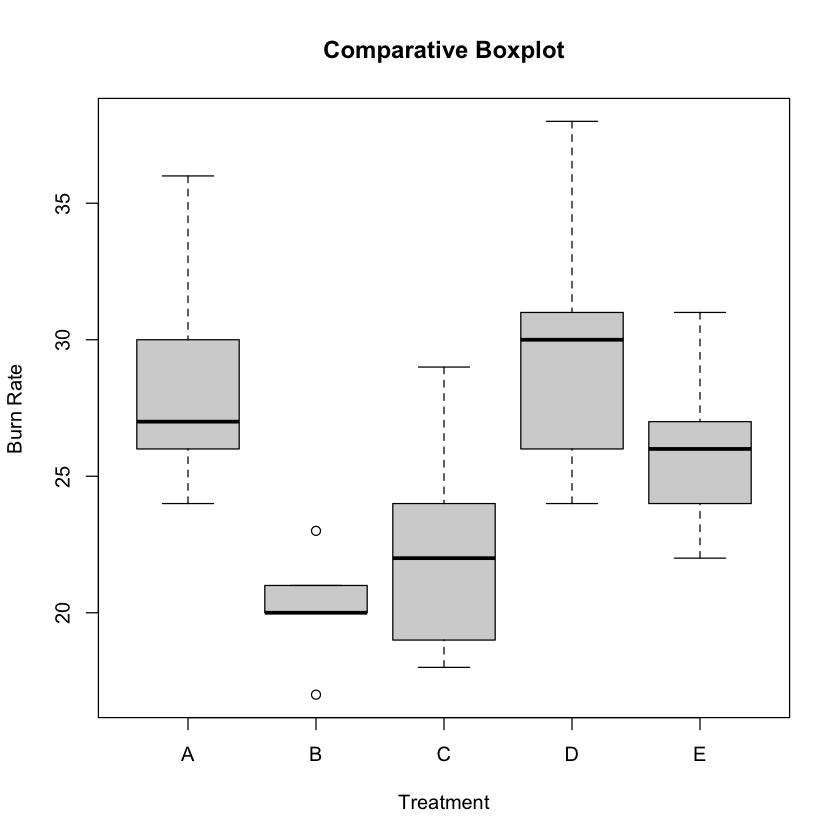

In [19]:
boxplot(Burn.Rate ~ Treatment, data=dataset, 
        main="Comparative Boxplot",
        xlab="Treatment",
        ylab="Burn Rate")

Using multi-blocking in ANOVA

In [20]:
anova <- aov(Burn.Rate ~ Treatment + Batch + Operator, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Treatment    4    330   82.50   7.734 0.00254 **
Batch        4     68   17.00   1.594 0.23906   
Operator     4    150   37.50   3.516 0.04037 * 
Residuals   12    128   10.67                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Display the Residual Diagnostic Plots

hat values (leverages) are all = 0.52
 and there are no factor predictors; no plot no. 5



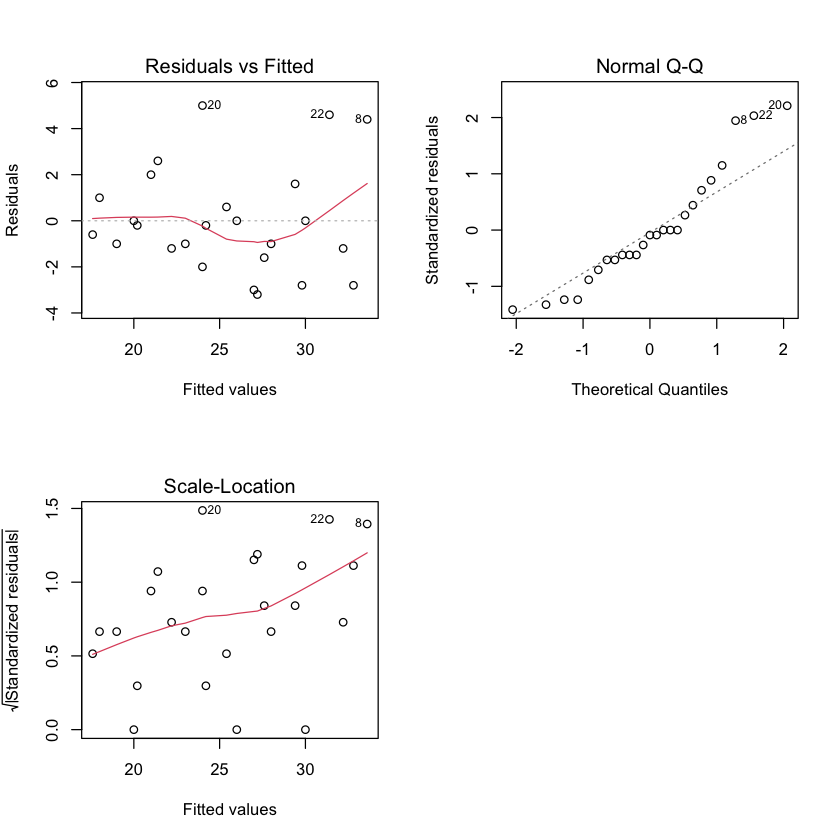

In [21]:
par(mfrow=c(2,2))
plot(anova)

Subtract the overall mean value from all observations and round off to the nearest number. This is to compress the data value.

Notice it has the same value as the "Coded Burn Rate" provided in the dataset.

In [22]:
mean(dataset$Burn.Rate)

[1] 25.4

In [23]:
dataset$Calculated.Coded.Burn.Rate <- round(dataset$Burn.Rate - mean(dataset$Burn.Rate), digits=0)
data.frame(t(dataset %>% select(Coded.Burn.Rate, Calculated.Coded.Burn.Rate)))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Coded.Burn.Rate,-1,-8,-7,1,-3,-5,-1,13,6,5,⋯,-1,2,2,-2,4,-1,11,-4,-3,6
Calculated.Coded.Burn.Rate,-1,-8,-7,1,-3,-5,-1,13,6,5,⋯,-1,2,2,-2,4,-1,11,-4,-3,6


Display recoded table and its totals for operators and treatments

In [24]:
data.frame(Batch=unique(dataset$Batch),
           Operator.1=(dataset %>% filter(Operator == "op1") %>% summarise(Pair=paste(Treatment, " = ", Coded.Burn.Rate)))$Pair,
           Operator.2=(dataset %>% filter(Operator == "op2") %>% summarise(Pair=paste(Treatment, " = ", Coded.Burn.Rate)))$Pair, 
           Operator.3=(dataset %>% filter(Operator == "op3") %>% summarise(Pair=paste(Treatment, " = ", Coded.Burn.Rate)))$Pair, 
           Operator.4=(dataset %>% filter(Operator == "op4") %>% summarise(Pair=paste(Treatment, " = ", Coded.Burn.Rate)))$Pair, 
           Operator.5=(dataset %>% filter(Operator == "op5") %>% summarise(Pair=paste(Treatment, " = ", Coded.Burn.Rate)))$Pair,
           Totals=(dataset %>% group_by(Batch) %>% summarise(Totals=sum(Coded.Burn.Rate)))$Totals)

Batch,Operator.1,Operator.2,Operator.3,Operator.4,Operator.5,Totals
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
batch1,A = -1,B = -5,C = -6,D = -1,E = -1,-14
batch2,B = -8,C = -1,D = 5,E = 2,A = 11,9
batch3,C = -7,D = 13,E = 1,A = 2,B = -4,5
batch4,D = 1,E = 6,A = 1,B = -2,C = -3,3
batch5,E = -3,A = 5,B = -5,C = 4,D = 6,7


In [25]:
data.frame(Operator.1=sum((dataset %>% filter(Operator == "op1"))$Coded.Burn.Rate),
           Operator.2=sum((dataset %>% filter(Operator == "op2"))$Coded.Burn.Rate),
           Operator.3=sum((dataset %>% filter(Operator == "op3"))$Coded.Burn.Rate),
           Operator.4=sum((dataset %>% filter(Operator == "op4"))$Coded.Burn.Rate),
           Operator.5=sum((dataset %>% filter(Operator == "op5"))$Coded.Burn.Rate),
           Totals=sum((dataset %>% group_by(Batch) %>% summarise(Totals=sum(Coded.Burn.Rate)))$Totals))

Operator.1,Operator.2,Operator.3,Operator.4,Operator.5,Totals
<int>,<int>,<int>,<int>,<int>,<int>
-18,18,-4,5,9,10


In [26]:
t(dataset %>% group_by(Treatment) %>% summarise(Totals=sum(Coded.Burn.Rate)))

Treatment,A,B,C,D,E
Totals,18,-24,-13,24,5


Using multi-blocking in ANOVA with recoded dataset.

Notice it has the same value as the non-recoded dataset. Moving forward, we will use the coded data.

In [27]:
anova <- aov(Coded.Burn.Rate ~ Treatment + Batch + Operator, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Treatment    4    330   82.50   7.734 0.00254 **
Batch        4     68   17.00   1.594 0.23906   
Operator     4    150   37.50   3.516 0.04037 * 
Residuals   12    128   10.67                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. Conclusion. We reject the null hypothesis as p-value < `0.05` (alpha level), indicating that there is insufficient evidence that all the factor means are equal.

Therefore, there is evidence of a significant variation (or difference) in outcome due to the formulations from different batches of raw material and operators.

## The Rocket Propellant Experiment (Extended)

This experiment aims to give a sense of **Graeco-Latin Square Design**.

Suppose now that there is an additional variable of `5` test assemblies (denoted by the greek letters) that could be of importance as different assembly would have variation in production of the formulation.

Firstly, import the data

In [28]:
dataset <- read.csv("rocket2.csv")

Display table to get a sense of the data

In [29]:
data.frame(Batch=unique(dataset$Batch),
           Operator.1=(dataset %>% filter(Operator == "op1") %>% summarise(Pair=paste(Treatment, "•", Assembly, " = ", Coded.Burn.Rate)))$Pair,
           Operator.2=(dataset %>% filter(Operator == "op2") %>% summarise(Pair=paste(Treatment, "•", Assembly, " = ", Coded.Burn.Rate)))$Pair, 
           Operator.3=(dataset %>% filter(Operator == "op3") %>% summarise(Pair=paste(Treatment, "•", Assembly, " = ", Coded.Burn.Rate)))$Pair, 
           Operator.4=(dataset %>% filter(Operator == "op4") %>% summarise(Pair=paste(Treatment, "•", Assembly, " = ", Coded.Burn.Rate)))$Pair, 
           Operator.5=(dataset %>% filter(Operator == "op5") %>% summarise(Pair=paste(Treatment, "•", Assembly, " = ", Coded.Burn.Rate)))$Pair,
           Totals=(dataset %>% group_by(Batch) %>% summarise(Totals=sum(Coded.Burn.Rate)))$Totals)

Batch,Operator.1,Operator.2,Operator.3,Operator.4,Operator.5,Totals
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
batch1,A • alpha = -1,B • gamma = -5,C • epsilon = -6,D • beta = -1,E • delta = -1,-14
batch2,B • beta = -8,C • delta = -1,D • alpha = 5,E • gamma = 2,A • epsilon = 11,9
batch3,C • gamma = -7,D • epsilon = 13,E • beta = 1,A • delta = 2,B • alpha = -4,5
batch4,D • delta = 1,E • alpha = 6,A • gamma = 1,B • epsilon = -2,C • beta = -3,3
batch5,E • epsilon = -3,A • beta = 5,B • delta = -5,C • alpha = 4,D • gamma = 6,7


Notice that every batch has a combination of treatments and assembly once

In [30]:
dataset %>% arrange(Assembly) %>% group_by(Batch) %>% summarise(Assemblies=paste0(Assembly, collapse=" , "), Treatments=paste0(Treatment, collapse=" , "))

Batch,Assemblies,Treatments
<chr>,<chr>,<chr>
batch1,"alpha , beta , delta , epsilon , gamma","A , D , E , C , B"
batch2,"alpha , beta , delta , epsilon , gamma","D , B , C , A , E"
batch3,"alpha , beta , delta , epsilon , gamma","B , E , A , D , C"
batch4,"alpha , beta , delta , epsilon , gamma","E , C , D , B , A"
batch5,"alpha , beta , delta , epsilon , gamma","C , A , B , E , D"


Display the totals

In [31]:
data.frame(Operator.1=sum((dataset %>% filter(Operator == "op1"))$Coded.Burn.Rate),
           Operator.2=sum((dataset %>% filter(Operator == "op2"))$Coded.Burn.Rate),
           Operator.3=sum((dataset %>% filter(Operator == "op3"))$Coded.Burn.Rate),
           Operator.4=sum((dataset %>% filter(Operator == "op4"))$Coded.Burn.Rate),
           Operator.5=sum((dataset %>% filter(Operator == "op5"))$Coded.Burn.Rate),
           Totals=sum((dataset %>% group_by(Batch) %>% summarise(Totals=sum(Coded.Burn.Rate)))$Totals))

Operator.1,Operator.2,Operator.3,Operator.4,Operator.5,Totals
<int>,<int>,<int>,<int>,<int>,<int>
-18,18,-4,5,9,10


Display totals for treatment

In [32]:
t(dataset %>% group_by(Treatment) %>% summarise(Totals=sum(Coded.Burn.Rate)))

Treatment,A,B,C,D,E
Totals,18,-24,-13,24,5


Display totals for assembly

In [33]:
t(dataset %>% group_by(Assembly) %>% summarise(Totals=sum(Coded.Burn.Rate)))

Assembly,alpha,beta,delta,epsilon,gamma
Totals,10,-6,-4,13,-3


Display boxplot for data

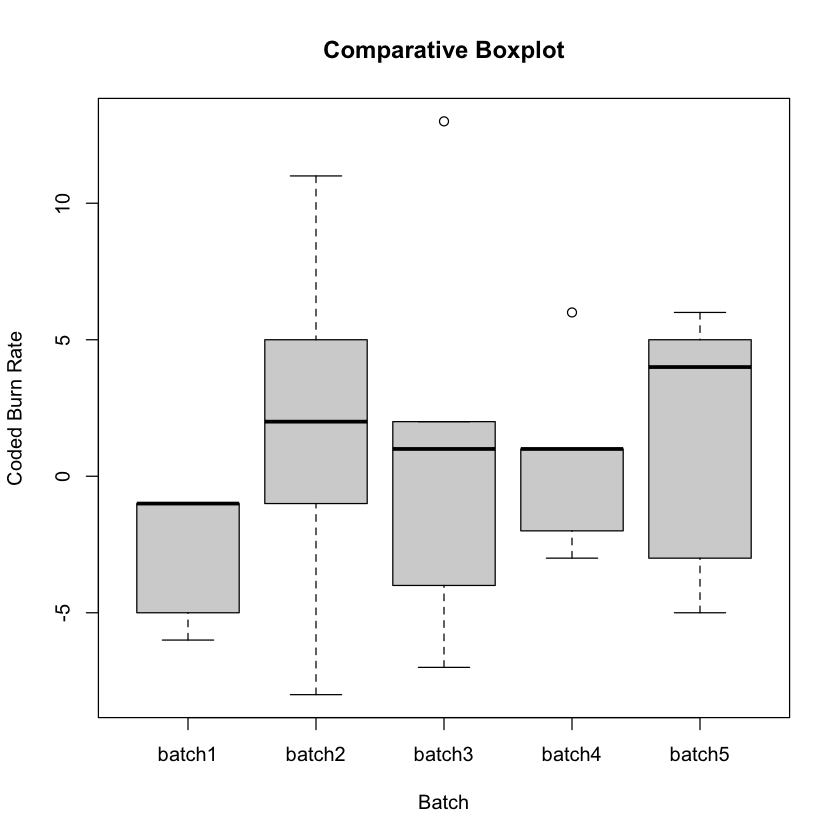

In [34]:
boxplot(Coded.Burn.Rate ~ Batch, data=dataset, 
        main="Comparative Boxplot",
        xlab="Batch",
        ylab="Coded Burn Rate")

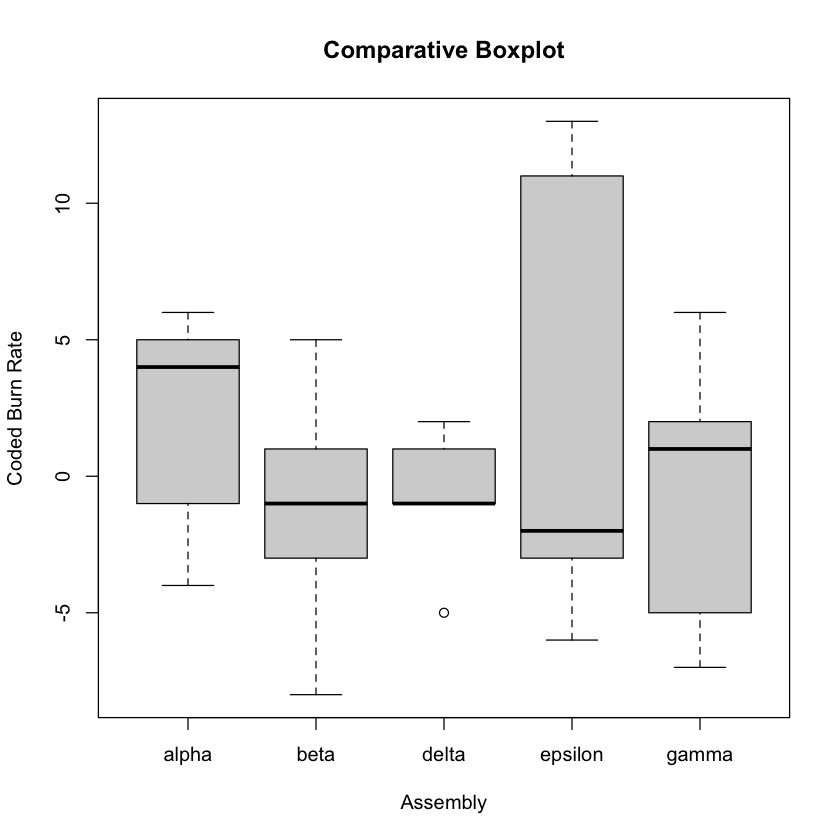

In [35]:
boxplot(Coded.Burn.Rate ~ Assembly, data=dataset, 
        main="Comparative Boxplot",
        xlab="Assembly",
        ylab="Coded Burn Rate")

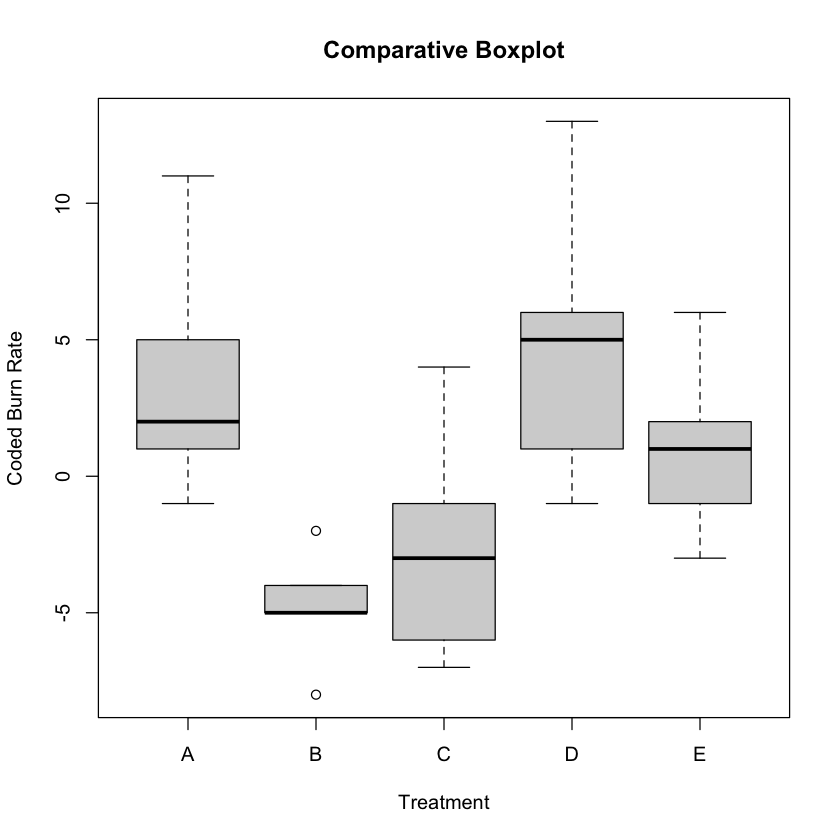

In [36]:
boxplot(Coded.Burn.Rate ~ Treatment, data=dataset, 
        main="Comparative Boxplot",
        xlab="Treatment",
        ylab="Coded Burn Rate")

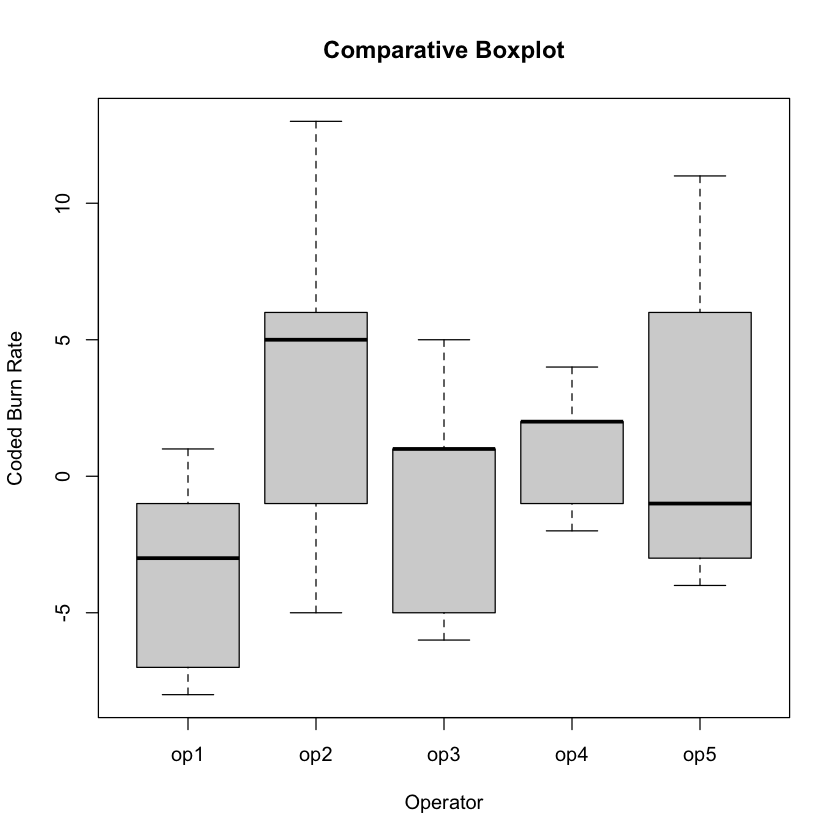

In [37]:
boxplot(Coded.Burn.Rate ~ Operator, data=dataset, 
        main="Comparative Boxplot",
        xlab="Operator",
        ylab="Coded Burn Rate")

Use multi-block (graeco) ANOVA

In [38]:
anova <- aov(Coded.Burn.Rate ~ Treatment + Batch + Operator + Assembly, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Treatment    4    330   82.50  10.000 0.00334 **
Batch        4     68   17.00   2.061 0.17831   
Operator     4    150   37.50   4.545 0.03293 * 
Assembly     4     62   15.50   1.879 0.20764   
Residuals    8     66    8.25                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Display the Residual Diagnostic Plots

hat values (leverages) are all = 0.68
 and there are no factor predictors; no plot no. 5



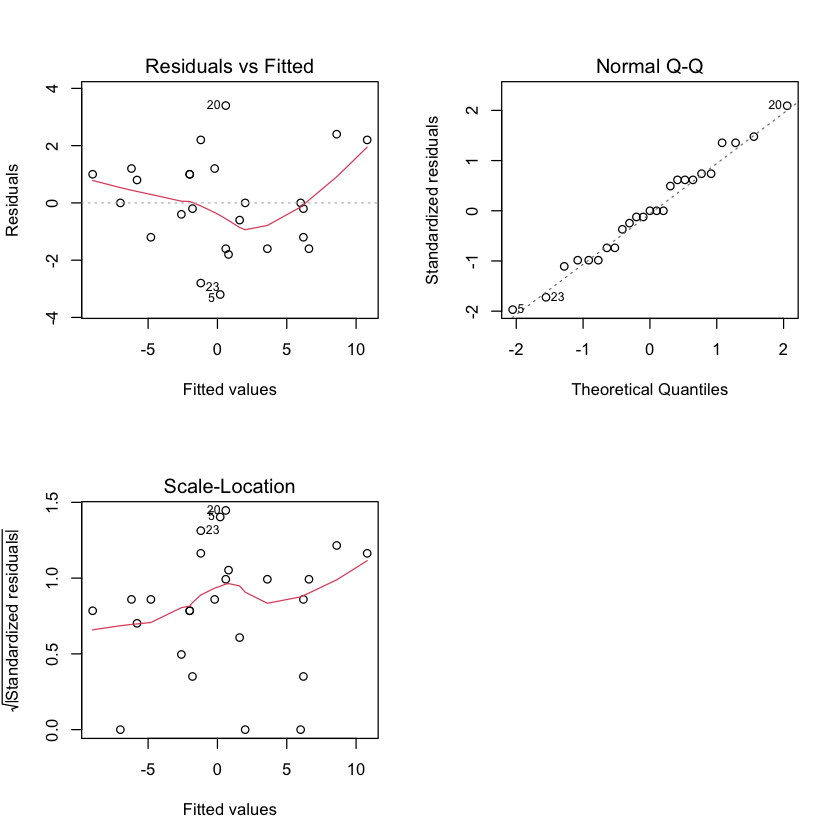

In [39]:
par(mfrow=c(2,2))
plot(anova)

Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. Conclusion: We reject the null hypothesis as p-value < `0.05` (alpha level), indicating that there is insufficient evidence that all the factor means are equal.

Therefore, there is evidence of a significant variation (or difference) in outcome due to the formulations from different batches of raw material, operators and assemblies.

## The Chemical Catalyst Experiment

This experiment aims to give a sense of **Balanced Incomplete Block Design (BIBD)**.

Suppose that an engineer thinks that the time of reaction for a chemical process depends on the type out of the `4` catalyst used.

The experiment procedure consists of selecting a batch of raw material, loading the pilot plant, applying each catalyst in a separate run of the pilot plant, and observing the reaction time. 

Because variations in the batches of raw material may affect the performance of the catalysts, the engineer decides to use batches of raw material as blocks, and each batch is only large enough to permit `3` catalysts to be run, hence a RIBD is used.

Hence, a **Randomised Incomplete Block Design (BIBD)** is used. The BIBD is shown to display how each block is randomised.

Firstly, import the data

In [40]:
dataset <- read.csv("chemical.csv")

Display imbalanced table for visualisation

In [41]:
dataset %>% group_by(Treatment) %>% summarise(Batches=paste(Batch, " = ", Yield, collapse=" , "), Totals=sum(Yield))

Treatment,Batches,Totals
<chr>,<chr>,<int>
c1,"1 = 73 , 2 = 74 , 4 = 71",218
c2,"2 = 75 , 3 = 67 , 4 = 72",214
c3,"1 = 73 , 2 = 75 , 3 = 68",216
c4,"1 = 75 , 3 = 72 , 4 = 75",222


Balance the table by setting `NA` for missing treatments to balance the design in batches.

In [42]:
for (t in unique(dataset$Treatment)) {
    for (b in unique(dataset$Batch)) {
        if (nrow(dataset %>% filter(Batch == b, Treatment == t)) == 0) {
            dataset <- rbind(dataset, list(Treatment=t, Batch=b, Yield=NA), stringsAsFactors=FALSE)
        }
    }
}

In [43]:
dataset <- dataset %>% arrange(Treatment, Batch)

Display balanced table for visualisation

In [44]:
data.frame(Treatment=unique(dataset_tbl$Treatment),
           Batch.1=(dataset %>% filter(Batch == 1))$Yield,
           Batch.2=(dataset %>% filter(Batch == 2))$Yield,
           Batch.3=(dataset %>% filter(Batch == 3))$Yield,
           Batch.4=(dataset %>% filter(Batch == 4))$Yield,
           Totals=(dataset %>% group_by(Treatment) %>% summarise(Totals=sum(Yield, na.rm=TRUE)))$Totals)

Treatment,Batch.1,Batch.2,Batch.3,Batch.4,Totals
<chr>,<int>,<int>,<int>,<int>,<int>
8500psi,73,74,NA,71,218
8700psi,NA,75,67,72,214
8900psi,73,75,68,NA,216
9100psi,75,NA,72,75,222


Display the totals for batches

In [45]:
data.frame(Batch.1=sum((dataset %>% filter(Batch == 1))$Yield, na.rm=TRUE),
           Batch.2=sum((dataset %>% filter(Batch == 2))$Yield, na.rm=TRUE),
           Batch.3=sum((dataset %>% filter(Batch == 3))$Yield, na.rm=TRUE),
           Batch.4=sum((dataset %>% filter(Batch == 4))$Yield, na.rm=TRUE),
           Totals=sum((dataset %>% group_by(Treatment) %>% summarise(Totals=sum(Yield, na.rm=TRUE)))$Totals))

Batch.1,Batch.2,Batch.3,Batch.4,Totals
<int>,<int>,<int>,<int>,<int>
221,224,207,218,870


Set batch as the factor

Question: Why "Batch" instead of "Treatment"?

In [46]:
dataset$Batch <- factor(dataset$Batch)

Using blocking in ANOVA

In [47]:
anova <- aov(Yield ~ Treatment + Batch + Error(Batch), data=dataset)
summary(anova)


Error: Batch
          Df Sum Sq Mean Sq
Treatment  3     55   18.33

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)  
Treatment  3  22.75   7.583   11.67 0.0107 *
Residuals  5   3.25   0.650                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1